# MNIST 데이터셋 학습 (to do)
MNIST 데이터셋은0~9까지 총 10개의 label로 이루어진 이미지 분류를 위한 사이즈의 손글씨 데이터셋이다.  
각각의 레이블마다 28×28 크기 이미지인 60,000개의 training 데이터셋, 10,000개의 test 데이터셋이 존재하고, 결과적으로 총 70,000개의 28×28 크기의 이미지로 데이터셋이 구성되어 있다.

In [3]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import backend
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## (1) 데이터셋

In [4]:
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]

(60000, 28, 28, 1) (60000, 10)


## (2) 모델링

In [6]:
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [7]:
def CNN(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=n_in))
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_out, activation='softmax'))
    return model

def CNN_BN(n_in, n_out):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=n_in))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Conv2D(32, (3, 3), padding='same',strides=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Dense(n_out, activation='softmax'))
    return model

In [8]:
model=CNN_BN(n_in, n_out)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 7, 7, 32)          0

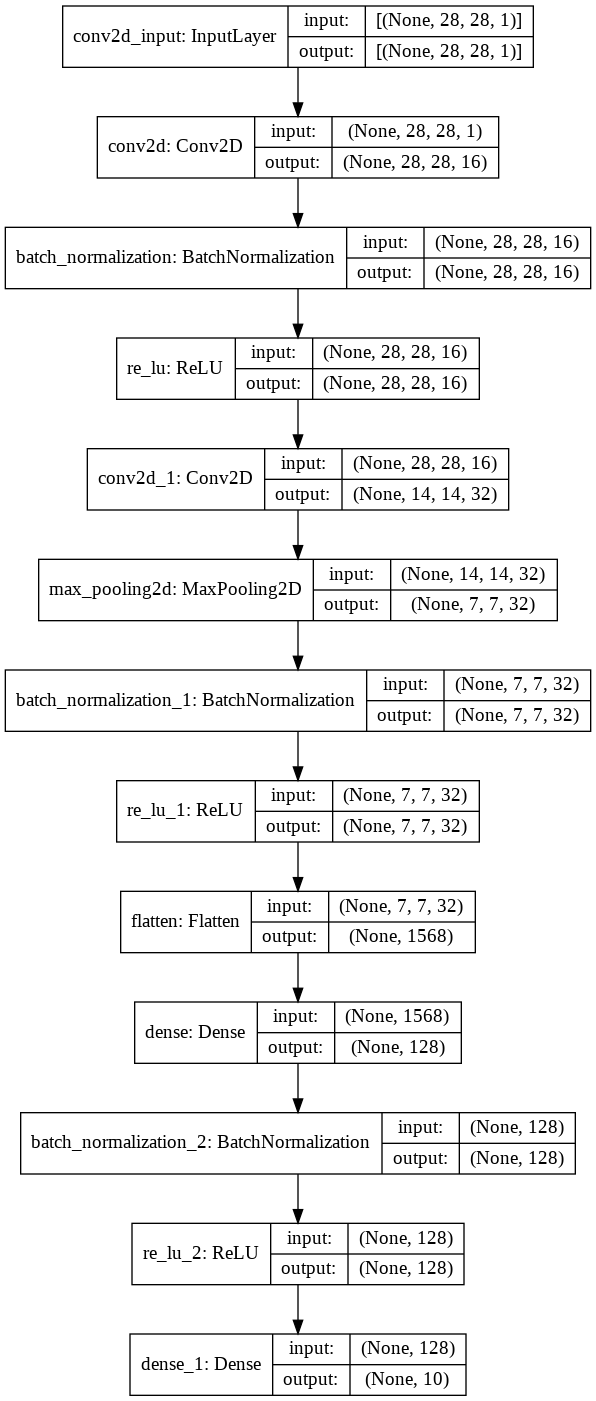

In [9]:
from tensorflow.keras.utils import plot_model
%matplotlib inline

plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=1e-6, epsilon=None, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## (4) 모델 학습시키기

In [12]:
earlystopper = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0, mode='auto')
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks = [earlystopper])

Epoch 1/20
375/375 [==============================] - 34s 11ms/step - loss: 0.1545 - accuracy: 0.9581 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0425 - accuracy: 0.9885 - val_loss: 0.0595 - val_accuracy: 0.9818
Epoch 3/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 4/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0154 - accuracy: 0.9964 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 5/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0418 - val_accuracy: 0.9882
Ep

## (5) 모델 평가하기

In [13]:
loss_and_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('loss : %.4f, accruracy : %.4f'%(loss_and_accuracy[0],loss_and_accuracy[1]))

79/79 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9904
loss : 0.0359, accruracy : 0.9904


## (6) 모델 사용하기

모델 평가 후, 분류 오류가 난 사례들을 확인해보고, 모델과 데이터셋에 대한 평가 및 분석해볼 것

predict label : 5, real label : 5


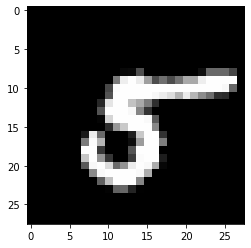

In [14]:
test_data = X_test[-2].reshape(1,28,28,1)
pred_y = model.predict(test_data).argmax()
real_y = Y_test[-2].argmax()
print('predict label : {}, real label : {}'.format(pred_y, real_y))
plt.imshow(X_test[-2].reshape(28,28), cmap='gray')